# Project 1: Customer Database
**This is the first of three mandatory projects to be handed in as part of the assessment for the course 02807 Computational Tools for Data Science at Technical University of Denmark, autumn 2019.**

#### Practical info
- **The project is to be done in groups of at most 3 students**
- **Each group has to hand in _one_ Jupyter notebook (this notebook) with their solution**
- **The hand-in of the notebook is due 2019-10-13, 23:59 on DTU Inside**

#### Your solution
- **Your solution should be in Python**
- **For each question you may use as many cells for your solution as you like**
- **You should document your solution and explain the choices you've made (for example by using multiple cells and use Markdown to assist the reader of the notebook)**
- **You should not remove the problem statements, and you should not modify the structure of the notebook**
- **Your notebook should be runnable, i.e., clicking [>>] in Jupyter should generate the result that you want to be assessed**
- **You are not expected to use machine learning to solve any of the exercises**
- **You will be assessed according to correctness and readability of your code, choice of solution, choice of tools and libraries, and documentation of your solution**

## Introduction
Your team has been hired by the company X as data scientists. X makes gadgets for a wide range of industrial and commercial clients.

As in-house data scientists, your teams first task, as per request from your new boss, is to optimize business operations. You have decided that a good first step would be to analyze the companys historical sales data to gain a better understanding of where profit is coming from. It may also reveal some low hanging fruit in terms of business opportunities.

To get started, you have called the IT department to get access to the customer and sales transactions database. To your horror you've been told that such a database doens't exist, and the only record of sales transactions is kept by John from finance in an Excel spreadsheet. So you've emailed John asking for a CSV dump of the spreadsheet...

In this project you need to clean the data you got from John, enrich it with further data, prepare a database for the data, and do some data analysis. The project is comprised of five parts. They are intended to be solved in the order they appear, but it is highly recommended that you read through all of them and devise an overall strategy before you start implementing anything.

## Part 1: Cleaning the data
John has emailed you the following link to the CSV dump you requested.

- [transactions.csv](https://raw.githubusercontent.com/patrickcording/02807-comp-tools/master/docker/work/data/transactions.csv)

It seems as though he has been a bit sloppy when keeping the records. 

In this part you should:
- Explain what the data is
- Clean it to prepare it for inserting into a database and doing data analysis 

---
### Solution

# Exercise 1 - Intro
In the following sections we go through each column/feature in the data and provide a feature description. Right after each description in a markdown cell we have the corresponding code cell with python to clean the data in the column described.
The columns 'company', 'country' and 'city' are described and cleaned together.

We thus iterate over all data multiple times, which is obviously slower than fixing everything in one iteration.

We do this to provide an easy to read implementation. We do not consider the performance of a clean up script important, since it only has to be run once. If it had to be run many times and someone was waiting for the answer each time, we would have selected another approach.

Before doing the feature description we import data:

In [1]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("transactions.csv", encoding='utf-8-sig')

### Part
This seems to be a partnumber (string). To investigate the purity and nature of the data 
the part number was analysed using command line. The following command revealed best results:
cut -d , -f 1 transactions.csv | sort | uniq -c
It showed that majority of part numbers were used around 200 times
10 records countained an empty part number
the "real part numbers" had format: 
4 or 5 digits followed by '-' followed by 3 or 4 digits
In total there are 100 different part numbers (excluding the empty part number)
We cannot correct part number data to include correct part number, since we cannot infer part number from remaining columns. Therefore, no cleanup is made for the 'Part' feature

### Company
This seems to be a company name (string)
To analyse the purity/nature following command was used:
cut -d , -f 2 transactions.csv | sort | uniq -c
36 different companies exist
Most appearing company is 'Thoughtmix' which appears 2795 times (raw data)
However 'Thoughtmix' also appears as 'Thoughtmixz' (this is assumed to be spelling error)
Apart from spelling errors there seem to be 3 outliers:
'-', 'a', 'aa' which all appear a single time

### Country
This seems to be the country, where the company is placed (string)
To analyse the purity/nature following command was used:
cut -d , -f 3 transactions.csv | sort | uniq -c
15 different countries were listed
The 'empty' country appeared 2171 times so it seems like John forgot to not the real company multiple times
Some as for company names some country names are listed wrongly:
e.g. 'US' is used once in stead of 'United States'
e.g. 'Tyskland' is used once in stead of 'Germany'

### City 
This seems to be the city, where the company is placed (string)
To analyse the purity/nature following command was used:
cut -d , -f 4 transactions.csv | sort | uniq -c
This gives 32 different cities
The whitespace sicty appear 33 times
Seems like there are few/no spelling mistakes
However, some values appear only once, so maybe the city was typed wrongly
for some companied/contries

### Fixing Issues
To fix issues for column: 'company', 'country', 'city' (including many empty countries), following command is useful:
cut -d , -f 2-4 transactions.csv | sort | uniq -c

In [2]:
##iterate over all rows to set:
    #Company names for companies registered with typos (very few of these)
    #Country and and City for records where these are different from the majority

#The majority has been found using the description above and all other records of that company are set to same country/city

#Only exception to this is company 'Flipstorm' which has two cities registered as costumers
    #For Flipstorm this was easy to fix as the two cities are in different countries
    #And all records for Flipstorm lists a country. So the country was used to assign a city
    
for index, row in df.iterrows():
    if (row['company'] == 'Avaveo' and row['country']!='France'):
        row['country'] = 'France'
    
    elif (row['company'] == 'Brainsphere'):
        if(row['country']!= 'Portugal'):
            row['country'] = 'Portugal'
        if(row['city']!='Braga'):
            row['city'] = 'Braga'
            
    elif(row['company']== 'Bubblemix' and row['country'] !='Japan'):
        row['country'] = 'Japan'
        
    elif(row['company']=='Buzzbean' and row['country'] != 'Germany'):
        row['country'] = 'Germany'
        
    elif(row['company']=='Chatterbridge' and row['country']!= 'Spain'):
        row['country']='Spain'
        
    elif(row['company']=='Eimbee' and row['country']!= 'France'):
        row['country']='France'

    elif(row['company']=='Flipstorm'):
        if(row['city'] == 'Athens' and row['country'] != 'Greece'):
            row['country']='Greece'
        if(row['city'] == 'Nanterre' and row['country'] != 'France'):
            row['country']='France'
    
    elif(row['company']=='Gabcube' and row['country']!= 'Portugal'):
        row['country']='Portugal'    
    
    elif(row['company']=='Gabtune' and row['country']!= 'France'):
        row['country']='France'

    elif(row['company']=='Gevee' and row['country']!= 'France'):
        row['country']='France'
        
    elif(row['company']=='Innojam' and row['country']!= 'Netherlands'):
        row['country']='Netherlands'
        
    elif(row['company']=='Kanoodle'):
        if(row['country']!= 'Netherlands'):
            row['country']='Netherlands'
        if(row['city']!='Niihama'):
            row['city']='Niihama'
     
    elif(row['company'] == 'Laj0'):
        row['company'] = 'Lajo'
        
    elif(row['company']=='Lajo' and row['country']!= 'Greece'):
        row['country']='Greece'
        
    elif(row['company'] == 'Ntagz'):
        row['company'] = 'Ntags'
        
    elif(row['company']=='Ntags'):
        if(row['country']!= 'Portugal'):
            row['country']='Portugal'
        if(row['city']!='Lisbon'):
            row['city']='Lisbon'
            
    elif(row['company']=='Realpoint' and row['country']!= 'Portugal'):
        row['country']='Portugal'
        
    elif(row['company']=='Thycero' and row['country']!= 'France'):
        row['country']='France'
        
    elif(row['company']=='Riffpath' and row['country']!= 'Greece'):
        row['country']='Greece'
        
    elif(row['company']=='Roodel' and row['country']!= 'Portugal'):
        row['country']='Portugal'
        
    elif(row['company']=='Shufflebeat'):
        if(row['country']!= 'Portugal'):
            row['country']='Portugal'
        if(row['city']!='Porto'):
            row['city']='Porto'
            
    elif(row['company']=='Tagtune' and row['country']!= 'Switzerland'):
        row['country']='Switzerland'
        
    elif(row['company']=='Teklist'):
        if(row['country']!= 'Netherlands'):
            row['country']='Netherlands'
        if(row['city']!='Arnhem'):
            row['city']='Arnhem'
            
    elif(row['company'] == 'Thoughtmixz'):
        row['company'] = 'Thoughtmix'
        
    elif(row['company']=='Thoughtmix'):
        if(row['country']!= 'Portugal'):
            row['country']='Portugal'
        if(row['city']!='Amadora'):
            row['city']='Amadora'
            
    elif(row['company']=='Twitterbeat'):
        if(row['country']!= 'France'):
            row['country']='France'
        if(row['city']!='Annecy'):
            row['city']='Annecy'
            
    elif(row['company']=='Voomm' and row['country']!= 'France'):
        row['country']='France'
        
    elif(row['company']=='Wordify'):
        if(row['country']!= 'United States'):
            row['country']='United States'
        if(row['city']!='New York'):
            row['city']='New York'
            
    elif(row['company']=='Yozio'):
        if(row['country']!= 'Greece'):
            row['country']='Greece'
        if(row['city']!='Patras'):
            row['city']='Patras'
            
    elif(row['company']=='Zoonder'):
        if(row['country']!= 'United States'):
            row['country']= 'United States'
        if(row['city']!='Boston'):
            row['city']='Boston'
            
    elif(row['company'] == 'Zooxo.'):
        row['company'] = 'Zooxo'        
            
    elif(row['company']=='Zooxo'):
        if(row['country']!= 'United Kingdom'):
            row['country']= 'United Kingdom'
        if(row['city']!='London'):
            row['city']='London'
    
    #We set company for typo'ed companies based on their location (NY and Boston)
    #Since there is only one company we sell to in new york and one company in Boston
    elif(row['company'] == ' -'):
        row['company'] = 'Zoonder'
        
    elif(row['company'] == ' a'):
        row['company'] = 'Wordify'
        
    elif(row['company'] == 'aa'):
        row['company'] = 'Wordify'
        
##Following was used for testing
#i=0            
#for index, row in df.iterrows():
#    if (row['company'] == 'Zoonder' and row['country']=='United States'):
#        i+=1
#print(i)

### Price

#negative values, e.g.  $-153.91
#values with $ first, e.g. $1.0
#empty value 

#cut -d , -f 5 transactions.csv | sort | uniq -c| head

#inspecting what they can start with: 
#cut -d , -f 5 transactions.csv | cut -c 1-1 | sort | uniq -c 
#Normal values: $, 1-9, Pund, Yen?
#Odd values: empty: 1, '-' (negative values): 61, 'n': 3, 'v': 2

        
#cut -d , -f 5 transactions.csv | grep n
#shows three entries have value 'na'

#cut -d , -f 5 transactions.csv | grep v
#shows two entries have value 'void'

#cut -d , -f 5 transactions.csv | grep - | head
#e.g.: '-181.47€', '£-91.3'

#using cmd: cut -d , -f 5 transactions.csv | grep € | cut -c 1-1 | sort | uniq
#we can see that lines with € generally end with € and doesn't have other monetary value at start
#Thus, since this is only monetary value which seems to be at the end, it seems fair to assume
#That no line contains two different monetary declarations (e.g. $12.12€)

#cut -d , -f 5 transactions.csv | grep € | grep -
#shows one line has value '-'

#=> empty value, '-' value, 'n' values, 'v' values.
#=> negative values treated as positive values
#=> positive values: extract monetary value from first or last char

#in python script do something like
#if starts with $ - dollar
#else if starts with € - euro
#else: Alert(has no monetary value) - to check if any lines have zero monetary declaration
#also check for double monetary declaration? 


In [3]:
translation_table = dict.fromkeys(map(ord, '$€£¥'), None)

for index, row in df.iterrows():
    if (row['price'] == 'na' or row['price'] == '-' or row['price'] == 'void' or not isinstance(row['price'],str)):
        row['price']=0
    else: 
        row['price'] = row['price'].translate(translation_table)
        #if(row['price'].startswith('-')):
         #   print(row['price'])
        pricestring = row['price'].split('.')
        priceint = int(pricestring[0]) * 100
        if (pricestring[0].startswith('-')):
            priceint -= int(pricestring[1])
        else:
            priceint += int(pricestring[1])
        row['price'] = priceint
        #if(row['price']<0):
         #   print(row['price'])

### Date
This seems to be the date for the transaction, consisting of a date and a specific time

cut -d , -f 6 transactions.csv | cut -d ' ' -f 1 | sort | uniq -c | head
7 10/04/2017
19 2016-01-02
same query with tail only reveals regular date formatted values:
14 2018-12-31
1 2019-02-21
1 2019-05-14
1 date

Inspect time parameter: 
cut -d , -f 6 transactions.csv | cut -d ' ' -f 2 | sort | uniq -c | head
9 
2 00:00:05
2 00:00:06
Same query with tail shows regular formatting (no value larger than 23:59:59)

Any with dates in middle?

using query: 
cut -d , -f 6 transactions.csv | cut -d ' ' -f 1 | cut -d '-' -f 2 | sort | uniq -c 
It can be seen that all rows (but ones with wrong format) have a value in second date format, which is 12 or below. Thus the second column defined the month and the date format is thus: 'yyyy:mm:dd'




In [4]:
j = 0
for index, row in df.iterrows():
    #one date has wrong format (year in end)
    #we assume this date has format (dd:mm:yyyy) and translates it to regular format (yyyy:mm:dd)
    if (row['date'].startswith('10/04/2017')):
        row['date']='2017/04/10'

In [5]:
df.astype({'company':'str'})
df.dtypes

part       object
company    object
country    object
city       object
price      object
date       object
dtype: object

---
## Part 2: Enriching the data

A common task for a data scientists is to combine or enrich data from internal sources with data available from external sources. The purpose of this can be either to fix issues with the data or to make it easier to derive insights from the data.

In this part you should enrich your data with data from at least one external source. You may look to part 4 for some  inspiration as to what is required. Your solution should be automated, i.e., you can not ask the reader of your notebook to download any data manually. You should argue why and what you expect to achieve by the enrichments you are doing.

---
### Solution

## Decribe required enrichment
In section 4 we have to compare the profit between companies. To do so, we should calculate all prices to use same currency, such that price of every transaction can be compared with the price of any other transaction.


---
## Part 3: Creating a database
Storing data in a relational database has the advantages that it is persistent, fast to query, and it will be easier access for other employees at Weyland-Yutani.

In this part you should:
- Create a database and table(s) for the data
- Insert data into the tables

You may use SQLite locally to do this. You should argue why you choose to store your data the way you do. 

---
### Solution

In [6]:
import sqlite3

#Connect to the database and create tables
conn = sqlite3.connect('weylandYutani.sqlite')
c = conn.cursor()

c.execute('CREATE TABLE IF NOT EXISTS transactions(transaction_id INTEGER PRIMARY KEY AUTOINCREMENT, part INTEGER, price INTEGER, date_time TEXT, company_name TEXT, company_country TEXT, company_city TEXT)')
conn.commit()


## Import data into the table

for index, row in df.iterrows():
    part = row['part']
    companyName = row['company']
    companyCountry = row['country']
    companyCity = row['city']
    price = row['price']
    date_time = row['date']
    c.execute("INSERT INTO transactions(part, price, date_time,company_name, company_country, company_city) VALUES (?, ?, ?, ?, ?, ?)", (part,price,date_time,companyName,companyCountry,companyCity))
    conn.commit()


---
## Part 4: Analyzing the data
You are now ready to analyze the data. Your goal is to gain some actionable business insights to present to your boss. 

In this part, you should ask some questions and try to answer them based on the data. You should write SQL queries to retrieve the data. For each question, you should state why it is relevant and what you expect to find.

To get you started, you should prepare answers to the following questions. You should add more questions.
#### Who are the most profitable clients?
Knowing which clients that generate the most revenue for the company will assist your boss in distributing customer service ressources.

#### Are there any clients for which profit is declining?
Declining profit from a specific client may indicate that the client is disatisfied with the product. Gaining a new client is often much more work than retaining one. Early warnings about declining profit may help your boss fighting customer churn.


Remember, you are taking this to your new boss, so think about how you present the data.

---
### Solution

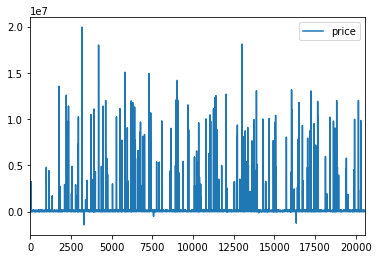

In [11]:
##The following plot shows each company and the profit that our company earned over time. 
df = pd.read_sql_query('SELECT price, date_time, company_name FROM transactions', conn)
    #for index, row in df.iterrows():
    #    row['price'] = row['price']*100)
    #df.astype({'price':'float'})
    #df.head(100)
df.plot()

---
## Part 5: Performance
Your boss is very impressed with what you have achieved in less than two weeks, and he would like to take your idea of storing the customer and sales data in a relational database to production. However, John is concerned that the solution will not scale. His experience is telling him that you will see many occurrences of the following queries.

- Show all sales to company X between time $t_1$ and time $t_2$
- Show the latest X sales in the database
- Show total sales per company per day

Show that Johns concern is not justified.

---
### Solution

It is true that with increasing number of records in the database the query time will increase. However we can index the database using the index commands. We could forexample to support the queries described above, index on companies and date time. Thus the queries would be significantly faster, even with large databases. 

The indexes can be made on any column that the boss would want. This would speed up the queries on that given data column.

Even maintaining the database would not be slower either. If the database indexing is implemented using beta-epsilon trees, we get insertions in $O(\frac{log_B N}{\epsilon B^{\epsilon}})$, where B is the block size and N is the size of the data, and $\epsilon$ is the relation between the degree of a node and the buffersize of the buffers that contain the updates. Where as if we would just use B-trees it would be $O(log_B N)$. Thus we get significantly better update times. The result is that we can actually maintain a database, while still being able to keep multiple index over the database. (See [An Introduction to Bε-trees and Write-Optimization](https://www.usenix.org/publications/login/oct15/bender)) 

---